In [ ]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import calendar


# **TITLE**


## New Cancer Patients – [National Institute of Neoplastic Diseases - INEN]


# DESCRIPTION

In [ ]:

# @title It is the daily record of New Patients. Each record is equal to one person, which can be characterized by the main department of care, date of affiliation, sex, age, location of place of birth and residence up to the district level.

In [ ]:
#lugar nacimiento:birth place,UBIGEO LUGAR RESIDENCIA:UBIGEO PLACE RESIDENCE,LUGAR RESIDENCIA:PLACE OF RESIDENCE,DISTRITO:DISTRICT

In [ ]:
#Downloading the dataset
New_Cancer_Patients=pd.read_csv('/content/drive/MyDrive/Omdena/Health/Pacientes_Nuevos_Oncológicos_INEN.csv' , encoding=('ISO-8859-1'))
New_Cancer_Patients.head()
print('Shape of the dataset:', New_Cancer_Patients.shape)

Shape of the dataset: (4658, 9)


# DATA CLEANING

In [ ]:
print('Shape of the dataset:', New_Cancer_Patients.shape)
print(New_Cancer_Patients.info())
print(New_Cancer_Patients.describe())
print('Total null value of the datasets:', New_Cancer_Patients.isnull().sum().sum())

Shape of the dataset: (4658, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4658 entries, 0 to 4657
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   DEPARTAMENTO_PRINCIPAL   4658 non-null   object
 1   FECHA_FILIACION          4658 non-null   int64 
 2   SEXO                     4658 non-null   object
 3   EDAD                     4658 non-null   int64 
 4   UBIGEO_LUGAR_NACIMIENTO  4658 non-null   int64 
 5   LUGAR_NACIMIENTO         4658 non-null   object
 6   UBIGEO_LUGAR_RESIDENCIA  4658 non-null   int64 
 7   LUGAR_RESIDENCIA         4658 non-null   object
 8   DISTRITO                 4658 non-null   object
 9   Equality                 4658 non-null   bool  
 10  DISTRITO_1               4658 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 368.6+ KB
None
       FECHA_FILIACION         EDAD  UBIGEO_LUGAR_NACIMIENTO  \
count      4658.000000  4658.000000      

In [ ]:
New_Cancer_Patients['Equality'] = New_Cancer_Patients['UBIGEO_LUGAR_NACIMIENTO'] == New_Cancer_Patients['UBIGEO_LUGAR_RESIDENCIA']

In [ ]:
New_Cancer_Patients.head()

,DEPARTAMENTO_PRINCIPAL,FECHA_FILIACION,SEXO,EDAD,UBIGEO_LUGAR_NACIMIENTO,LUGAR_NACIMIENTO,UBIGEO_LUGAR_RESIDENCIA,LUGAR_RESIDENCIA,DISTRITO,Equality
0,GINECOLOGIA,44564,FEMENINO,28,150801,LIMA-HUAURA-HUACHO,150810,LIMA-HUAURA-SANTA MARIA,SANTA MARIA,False
1,GINECOLOGIA,44564,FEMENINO,53,21508,ANCASH-PALLASCA-PALLASCA,150112,LIMA-LIMA-INDEPENDENCIA,INDEPENDENCIA,False
2,GINECOLOGIA,44564,FEMENINO,56,150806,LIMA-HUAURA-HUAURA,150810,LIMA-HUAURA-SANTA MARIA,SANTA MARIA,False
3,GINECOLOGIA,44564,FEMENINO,72,60101,CAJAMARCA-CAJAMARCA-CAJAMARCA,60101,CAJAMARCA-CAJAMARCA-CAJAMARCA,CAJAMARCA,True
4,GINECOLOGIA,44564,FEMENINO,31,150121,LIMA-LIMA-PUEBLO LIBRE,150105,LIMA-LIMA-BRENA,BRENA,False


In [ ]:
New_Cancer_Patients.Equality.value_counts()

False    3474
True     1184
Name: Equality, dtype: int64

# DATA VIASUALISATION

## Demographic Analysis


### Gender Distribution

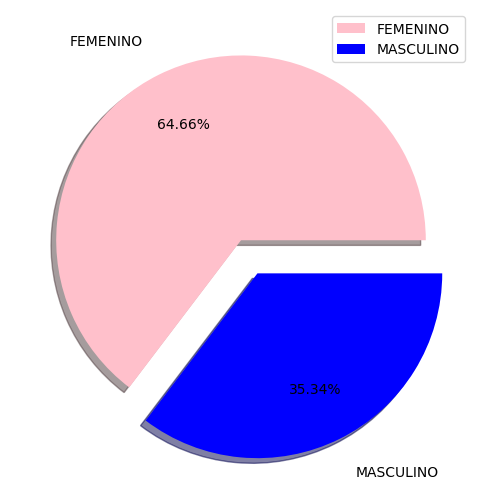

In [ ]:
# Total count of male and female
Gender_count = New_Cancer_Patients.SEXO.value_counts()
Gender_count
plt.figure(figsize=(12,6))
plt.pie(x=Gender_count, labels=Gender_count.index,
        colors=[ 'pink', 'blue'],
        explode = [ 0, 0.2],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True)

plt.legend();



'''Females are more affected by cancer (64.66%) compared to male (35.34%)'''





### Age distribution


<Axes: xlabel='EDAD', ylabel='Density'>

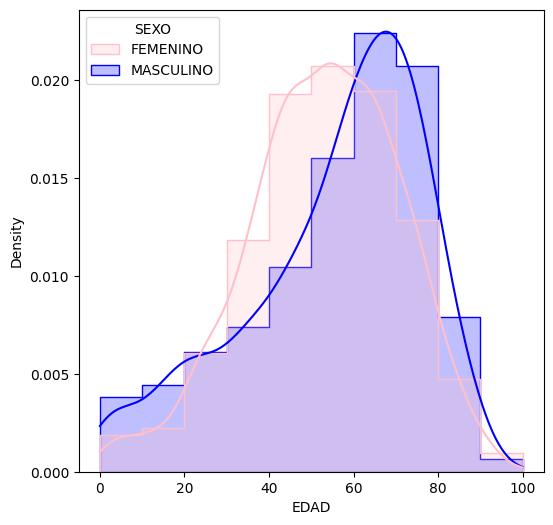

In [ ]:
plt.figure(figsize=(6, 6))
colors = {'MASCULINO': 'blue', 'FEMENINO': 'pink'}
sns.histplot(data=New_Cancer_Patients, x='EDAD', hue='SEXO', kde=True, bins=10, element='step',palette=colors, stat='density', common_norm=False)

'''The histogram plot reveals distinct patterns in cancer distribution based on age and gender.
Notably, males aged 70 exhibit a higher prevalence, with a density of 0.02,
indicating a concentration of cancer cases in this age group. Additionally,
the data illustrates two prominent age ranges where females are significantly
affected — the first peak occurs between the ages of 50 to 60, and the second between 70 to 80,
where males also show an elevated density.
This nuanced analysis sheds light on age and gender-specific trends within the dataset,
providing valuable insights into the distribution of cancer cases.'''

## Departmental Analysis


In [ ]:
filtered_df = New_Cancer_Patients[New_Cancer_Patients['Equality'] == True]
filtered_df1 = New_Cancer_Patients[New_Cancer_Patients['Equality'] == False]

### Number of Cancer pateints in each department

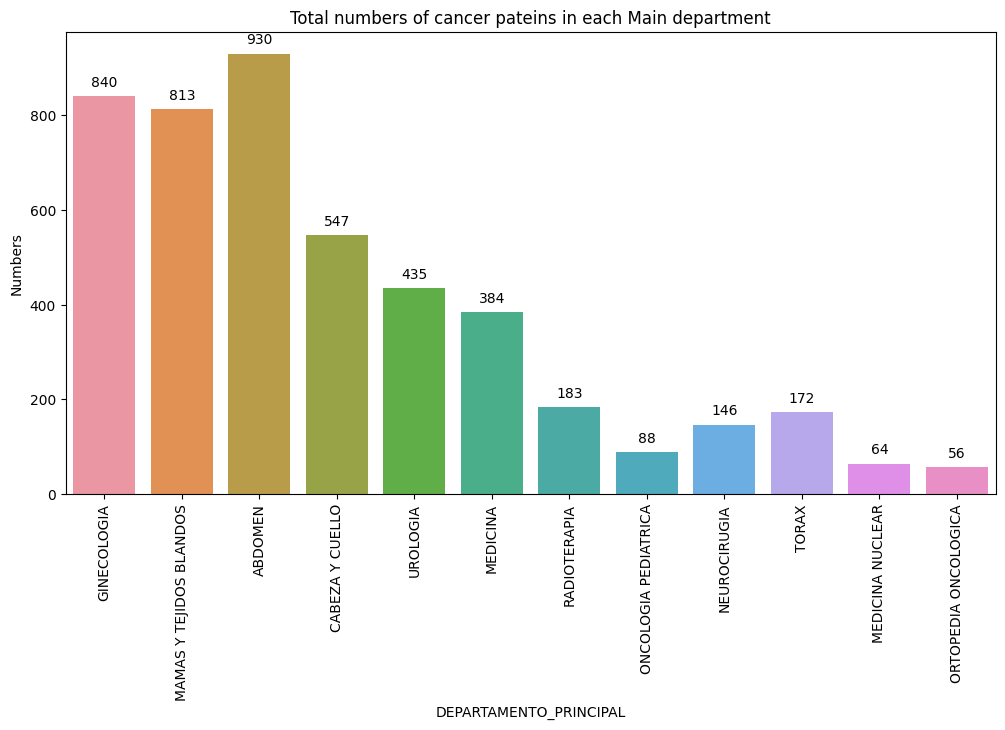

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(x='DEPARTAMENTO_PRINCIPAL', data=New_Cancer_Patients)
plt.xlabel('DEPARTAMENTO_PRINCIPAL')
plt.ylabel('Numbers')
plt.title('Total numbers of cancer pateins in each Main department')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = 90)

plt.show()

'''After analyzing the distribution of cancer patients across various specialized departments, several noteworthy patterns emerge. Abdominal cancers (930 cases) exhibit the highest prevalence, indicating a significant burden within this category. Following closely, Mammary Tissues and Soft Tissues cancers (813 cases) underscore the importance of understanding and addressing cancers affecting breast and soft tissue regions. Gynecological cancers (840 cases) also contribute substantially to the overall cancer burden, emphasizing the need for targeted interventions in women's health. Head and Neck cancers (547 cases) further contribute to the complexity of the oncological landscape. This comprehensive overview guides our understanding of the diverse challenges posed by different types of cancers, informing healthcare strategies and research initiatives for improved patient outcomes.'''

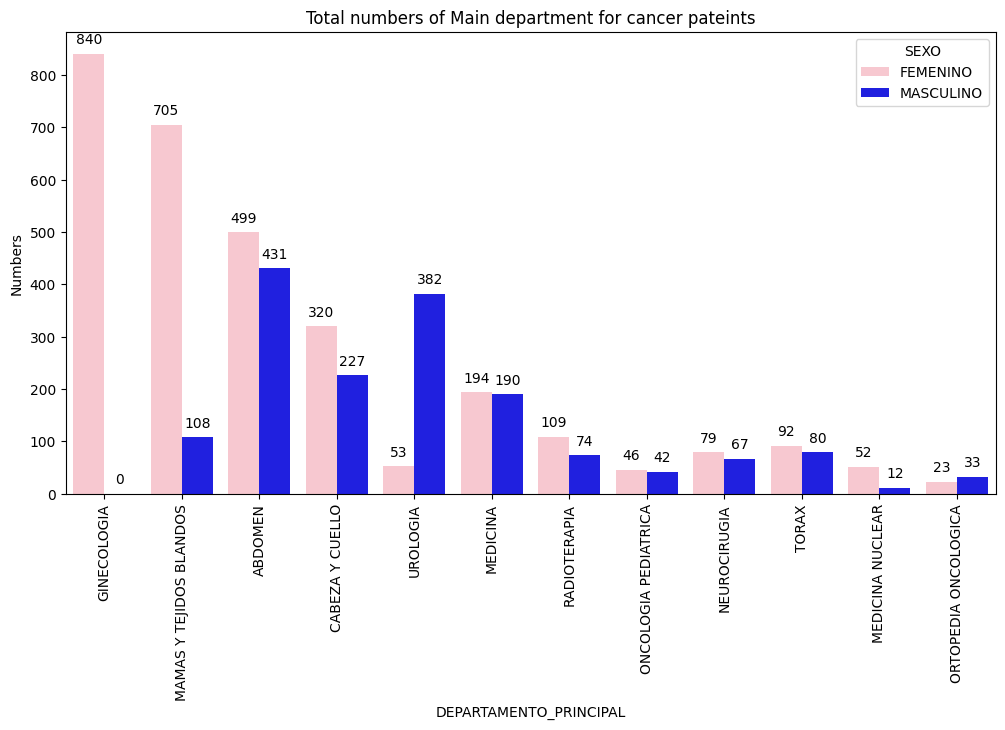

In [ ]:
plt.figure(figsize=(12, 6))
colors = {'MASCULINO': 'blue', 'FEMENINO': 'pink'}
sns.countplot(x='DEPARTAMENTO_PRINCIPAL',hue='SEXO',palette=colors, data=New_Cancer_Patients)
plt.xlabel('DEPARTAMENTO_PRINCIPAL')
plt.ylabel('Numbers')
plt.title('Total numbers of Main department for cancer pateints')
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation = 90)

plt.show()

'''The analysis of cancer types and their respective prevalence among genders reveals notable trends. Gynecological cancers (840 cases) emerge as the most highly affected, predominantly impacting females. Following closely are breast and soft tissue cancers (705 cases), which also exhibit a higher incidence among females. However, abdominal cancers present a more balanced distribution, with 499 cases affecting males and 431 cases affecting females. In contrast, urological cancers show a significant gender disparity, with 382 cases affecting males and only 53 cases affecting females. This comprehensive examination of cancer types and their gender-specific occurrences provides valuable insights into the varying impact of different cancers within the population.'''

In [ ]:
# Assuming you want to categorize 'day' and combine categories with count less than 5 into 'Others'
threshold = 120

# Get the counts of each category
District_counts=New_Cancer_Patients['DISTRITO'].value_counts()

# Create a new column with categories or 'Others'
New_Cancer_Patients['DISTRITO_1'] = New_Cancer_Patients['DISTRITO'].apply(lambda x: x if District_counts[x] >= threshold else 'OTHERS')

<Figure size 1000x600 with 0 Axes>

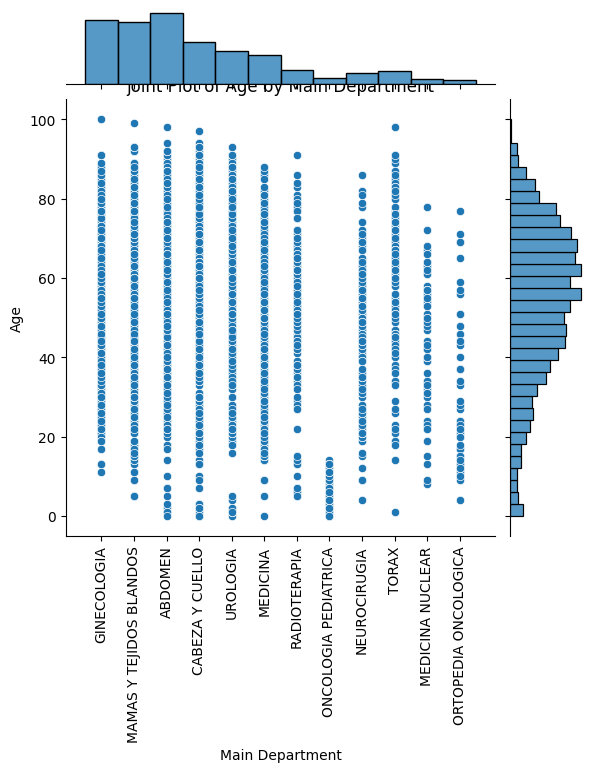

In [ ]:
plt.figure(figsize=(10, 6))
# markers = ['o', 's']

ax=sns.jointplot(x='DEPARTAMENTO_PRINCIPAL', y='EDAD', data=New_Cancer_Patients)

# Show the plot
plt.title('joint Plot of Age by Main Department')
plt.xlabel('Main Department')
plt.ylabel('Age')
plt.xticks(rotation = 90)

plt.show()

"The analysis of new cancer cases highlights a predominant occurrence within the age range of 50 to 80. This age bracket is particularly susceptible to various types of cancers, including gynecological cancers (e.g., ginecologia), breast and soft tissue cancers (mamas y tejidos blandos), and abdominal cancers. The concentration of new cancer diagnoses in this age group underscores the significance of targeted screening and preventive measures for individuals aged 50 to 80. This information is crucial for healthcare planning and emphasizes the need for age-specific cancer awareness and early detection campaigns."

In [ ]:
New_Cancer_Patients['DEPARTAMENTO_PRINCIPAL'].value_counts()

ABDOMEN                    930
GINECOLOGIA                840
MAMAS Y TEJIDOS BLANDOS    813
CABEZA Y CUELLO            547
UROLOGIA                   435
MEDICINA                   384
RADIOTERAPIA               183
TORAX                      172
NEUROCIRUGIA               146
ONCOLOGIA PEDIATRICA        88
MEDICINA NUCLEAR            64
ORTOPEDIA ONCOLOGICA        56
Name: DEPARTAMENTO_PRINCIPAL, dtype: int64

In [ ]:
New_Cancer_Patients.DISTRITO_1.value_counts()

OTHERS                    3715
SAN JUAN DE LURIGANCHO     236
LIMA                       158
COMAS                      151
VILLA EL SALVADOR          137
ATE                        135
SAN MARTIN DE PORRES       126
Name: DISTRITO_1, dtype: int64

In [ ]:
GINECOLOGIA = New_Cancer_Patients[(New_Cancer_Patients['DEPARTAMENTO_PRINCIPAL'] == 'GINECOLOGIA') & (New_Cancer_Patients['DISTRITO_1'] != 'OTHERS')]#
ABDOMEN = New_Cancer_Patients[(New_Cancer_Patients['DEPARTAMENTO_PRINCIPAL'] == 'ABDOMEN') & (New_Cancer_Patients['DISTRITO_1'] != 'OTHERS')]
MAMAS_Y_TEJIDOS_BLANDOS = New_Cancer_Patients[(New_Cancer_Patients['DEPARTAMENTO_PRINCIPAL'] == 'MAMAS Y TEJIDOS BLANDOS') & (New_Cancer_Patients['DISTRITO_1'] != 'OTHERS')]

## Geographical Distribution of Cancer Cases: Insights from District-Level Analysis

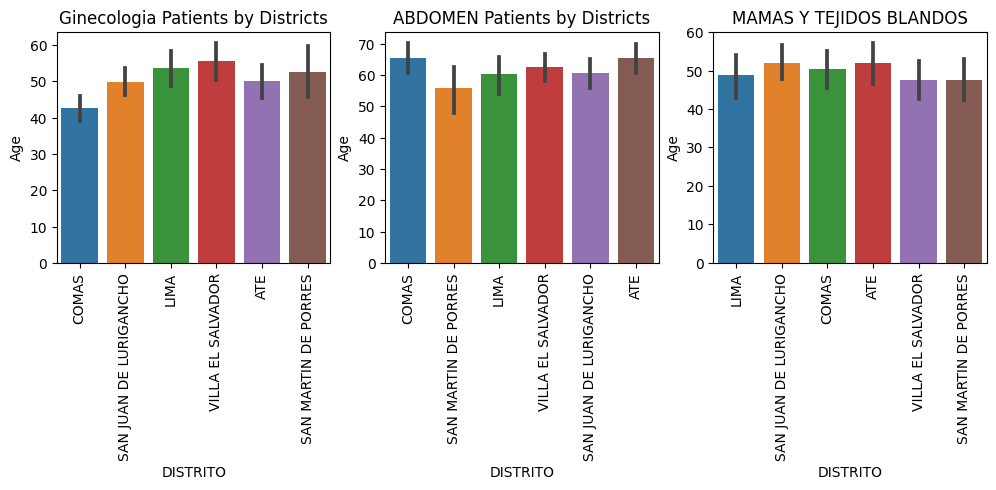

In [ ]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
sns.barplot( x='DISTRITO',y='EDAD', data=GINECOLOGIA)
# Show the plot
plt.title('Ginecologia Patients by Districts')
plt.xlabel('DISTRITO')
plt.ylabel('Age')
plt.xticks(rotation = 90)

# Plot for Another_Subplot1
plt.subplot(1, 3, 2)
sns.barplot(x='DISTRITO', y='EDAD', data=ABDOMEN)#hue='SEXO',
plt.title('ABDOMEN Patients by Districts')
plt.xlabel('DISTRITO')
plt.ylabel('Age')
plt.xticks(rotation=90)

# Plot for Another_Subplot2
plt.subplot(1, 3, 3)
sns.barplot(x='DISTRITO', y='EDAD',data=MAMAS_Y_TEJIDOS_BLANDOS)
plt.title('MAMAS Y TEJIDOS BLANDOS')
plt.xlabel('DISTRITO')
plt.ylabel('Age')
plt.xticks(rotation=90)

# # Adjust layout for better visualization
# plt.tight_layout()

# Adjust layout for better visualization
plt.subplots_adjust(hspace=0.5)  # Adjust the vertical space between subplots

# Show the plot
plt.show()


'''The detailed analysis of cancer distribution across districts and age groups reveals distinct patterns in the prevalence of Mammary Tissues, Soft Tissues, Abdominal, and Gynecological cancers. In San Juan de Lurigancho, Mammary Tissues and Soft Tissues cancers exhibit the highest incidence among individuals above 50 years, emphasizing the significance of targeted healthcare strategies for this age group. Notably, in Comas, Mammary Tissues and Soft Tissues cancers maintain a high rate among those above 50 years, highlighting the need for age-specific interventions. In the case of Abdominal cancers, the highest rates are observed in districts such as Ate and Comas among individuals aged 60 to 70, underscoring the importance of tailored healthcare resources for this demographic. Similarly, for Gynecological cancers, Villas maintains the highest rates among individuals aged 50 to 60, indicating the need for focused interventions in this district. San Martin and Lima follow closely, particularly among those aged 50 to 60. These findings provide valuable insights for healthcare planning, allowing for the development of targeted prevention and treatment strategies tailored to the specific demographics of each district.'''

In [ ]:
New_Cancer_Patients.head(1)

,DEPARTAMENTO_PRINCIPAL,FECHA_FILIACION,SEXO,EDAD,UBIGEO_LUGAR_NACIMIENTO,LUGAR_NACIMIENTO,UBIGEO_LUGAR_RESIDENCIA,LUGAR_RESIDENCIA,DISTRITO,Equality,DISTRITO_1
0,GINECOLOGIA,44564,FEMENINO,28,150801,LIMA-HUAURA-HUACHO,150810,LIMA-HUAURA-SANTA MARIA,SANTA MARIA,False,OTHERS


In [ ]:
filtered_New_Cancer_Patients=New_Cancer_Patients[New_Cancer_Patients['DISTRITO_1'] != 'OTHERS']

In [ ]:
filtered_New_Cancer_Patients['DEPARTAMENTO_PRINCIPAL'].value_counts()

ABDOMEN                    199
MAMAS Y TEJIDOS BLANDOS    186
GINECOLOGIA                181
CABEZA Y CUELLO             92
UROLOGIA                    82
MEDICINA                    60
RADIOTERAPIA                47
TORAX                       31
NEUROCIRUGIA                27
ONCOLOGIA PEDIATRICA        15
MEDICINA NUCLEAR            13
ORTOPEDIA ONCOLOGICA        10
Name: DEPARTAMENTO_PRINCIPAL, dtype: int64

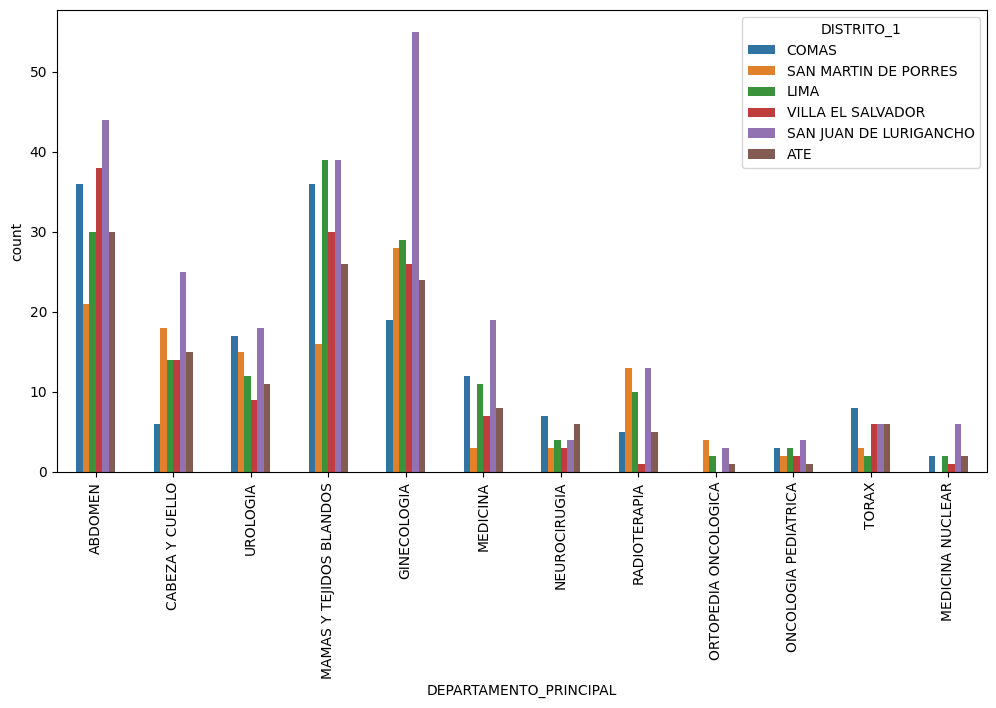

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot( x='DEPARTAMENTO_PRINCIPAL', hue='DISTRITO_1',width=0.5,data=filtered_New_Cancer_Patients)
plt.xticks(rotation = 90);

'''This distribution provides valuable insights into the prevalence of cancer across different specialized departments. 'Abdomen,' 'Mammary Tissues and Soft Tissues,' and 'Gynecology' emerge as the top three departments with the highest case counts. However, each department presents unique challenges and necessitates specific healthcare strategies. The visual representation of these counts in the bar plot aids in highlighting the varying impact of cancer across specialized medical departments, guiding future healthcare initiatives for improved patient outcomes.'''

# CONCLUSION

'''"Conclusion based on the counts of cancer patients for Abdomen, Mammary Tissues and Soft Tissues, Gynecology, and the specific age and district patterns:

After an in-depth examination of cancer cases, several noteworthy trends have emerged, shedding light on the distribution of cancer patients across different departments, districts, and age groups. Abdominal cancers (930 cases) demonstrate a substantial prevalence, with the highest incidence observed in districts such as Ate and Comas among individuals aged 60 to 70. Villas and Lima also exhibit significant rates, particularly in the 50 to 60 age range, suggesting a need for focused healthcare resources in these regions.

Mammary Tissues and Soft Tissues cancers (813 cases) show a distinctive pattern, ranking highest in San Juan de Lurigancho among individuals around 50 years old. Additionally, these cancers maintain a significant presence in Ate among those above 50 years and in Comas for the age group between 40 to 50 years. This emphasizes the importance of targeted interventions for Mammary Tissues and Soft Tissues cancers, accounting for both age and district-specific variations.

Gynecological cancers (840 cases) present a nuanced distribution, with Villas leading among individuals aged 50 to 60. San Martin and Lima closely follow, particularly within the same age range. Ate and San Juan also show notable rates among those aged 50 years. This insight highlights the need for tailored healthcare strategies in Villas, San Martin, Lima, Ate, and San Juan to address Gynecological cancers.

In conclusion, these findings provide crucial insights for healthcare planning and resource allocation, emphasizing the importance of considering not only the type of cancer but also the specific demographics and geographic variations within districts. Tailored interventions, screening programs, and targeted support can significantly enhance the effectiveness of cancer management and prevention strategies."'''

# REFERENCES


'''
References:

New Cancer Patients – [National Institute of Neoplastic Diseases - INEN]. New Cancer Patiens. Retrieved from [https://www.datosabiertos.gob.pe/dataset/pacientes-oncol%C3%B3gicos-nuevos-%E2%80%93-instituto-nacional-de-enfermedades-neopl%C3%A1sicas-inen-0]

'''